### Data Preprocessing
Load the MNIST handwritten digit dataset and perform the following pre-processing steps:
- Normalize the pixel values of the images.
- Apply one-hot encoding to the target labels.
- Split the data into training, validation, and test sets.


In [24]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [25]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std of MNIST
])

In [26]:
train_dataset = torchvision.datasets.MNIST(root='../data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='../data', train=False, transform=transform, download=True)

In [27]:
train_targets = F.one_hot(train_dataset.targets, num_classes=10)
test_targets = F.one_hot(test_dataset.targets, num_classes=10)

In [28]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

In [29]:
batch_size = 64  # You can change this

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [30]:
print(f"Train size: {len(train_dataset)}\nValidation size: {len(val_dataset)}\nTest size: {len(test_dataset)}")

Train size: 48000
Validation size: 12000
Test size: 10000


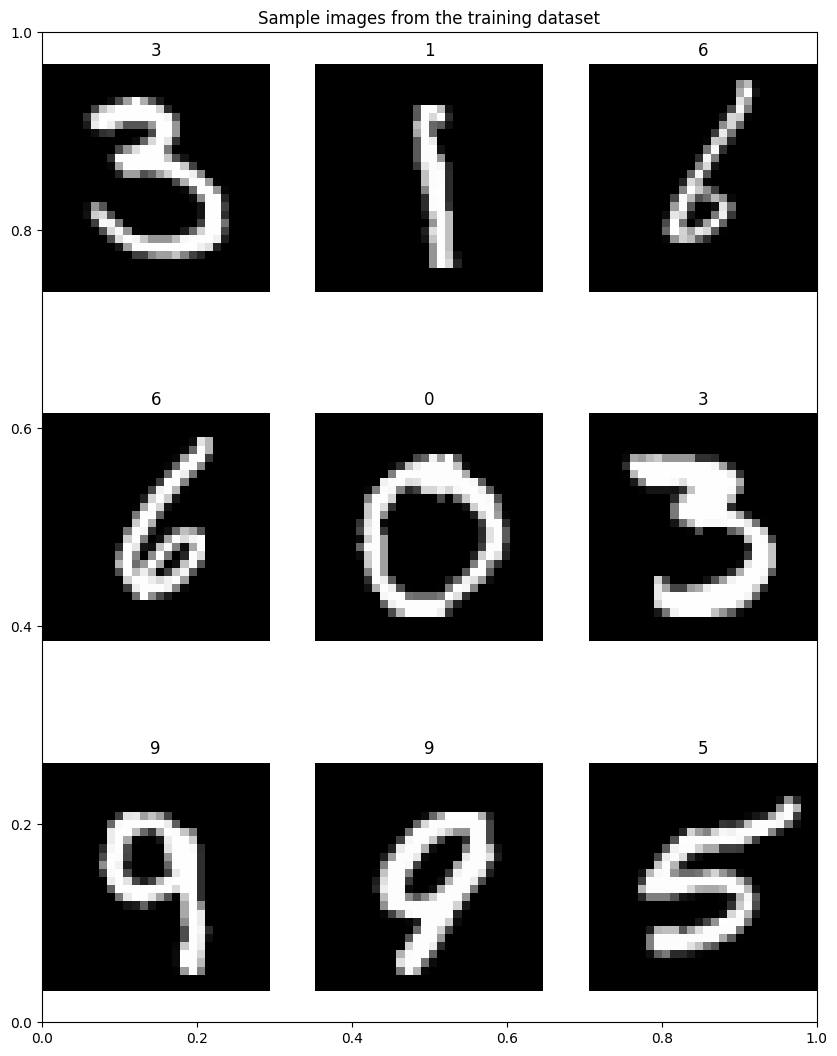

In [32]:
plt.figure(figsize=(10, 10))
plt.title("Sample images from the training dataset")
plt.subplots_adjust(top=1.1)
for i in range(9):
    plt.subplot(3, 3, i + 1)
    image, label = train_dataset[i]
    plt.imshow(train_dataset[i][0].squeeze(), cmap='gray')
    plt.title(train_dataset[i][1])
    plt.axis('off')
plt.show()
    